In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

<IPython.core.display.Javascript object>


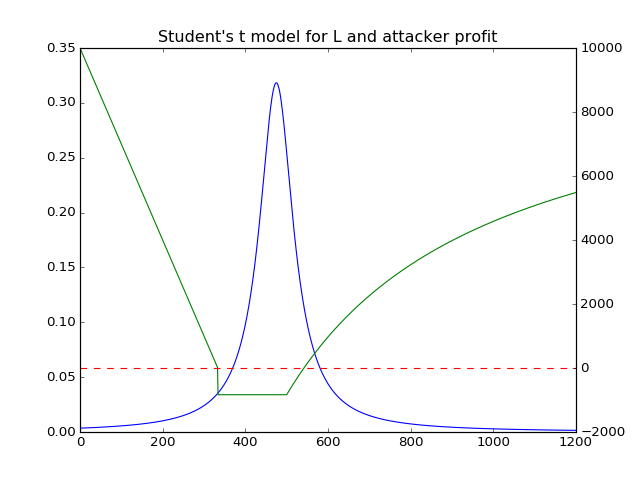

Attacker's expected profit is: 0.6351344755967148 dai


In [6]:
fig, ax = plt.subplots()

MAX_PRICE = 1200.

wut = 500.0
tab = 10000.
ink = 30.
axe = 1.0835

df = 1.
sigma = wut/10.
r = 0.95

x = np.linspace(0., MAX_PRICE, 1000)

t = scipy.stats.t

t_x = t.pdf((x - wut*r)/sigma, df)

ax.plot(x, t_x)

p_x = np.array([(tab - l*ink) for l in x if l < tab/ink]
              + [-(axe - 1.)*tab for l in x if (l >= tab/ink) and (l < wut)]
              + [(1 - axe*wut/l)*tab for l in x  if (l >= wut)])

ax2 = ax.twinx()
ax2.plot(x, p_x, color='green')
ax2.axhline(0, linestyle='--', color='red')
ax.set_title("Student's t model for L and attacker profit")

# calculate expected profit by integrating:
expected_profit = np.trapz(p_x * t_x)

print("Attacker's expected profit is: {} dai".format(expected_profit))